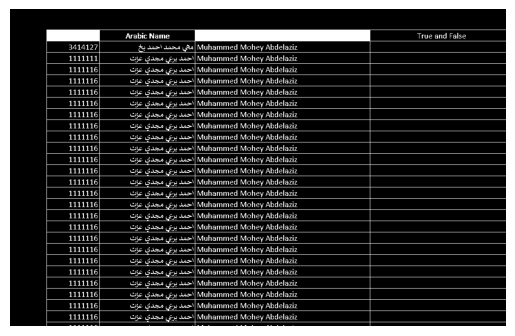

In [1]:
# import libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'gray'


# read image
img = cv.imread('./Assets/test1.png', 0)
(thresh, img_bin) = cv.threshold(img, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
img_bin = 255-img_bin 
cv.imwrite("Image_bin.jpg",img_bin)
plt.axis('off')
plt.imshow(img_bin);

In [2]:
def getLines(x):
    # Defining a kernel length
    global horizontalLinesImg, verticalLinesImg, kernel
    
    # Defining a kernel length
    kernelLength = np.array(img).shape[1]//x

    # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
    verticalkKernel = cv.getStructuringElement(
        cv.MORPH_RECT, (1, kernelLength))

    # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
    horiKernel = cv.getStructuringElement(cv.MORPH_RECT, (kernelLength, 1))

    # A kernel of (3 X 3) ones.
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))

    # Morphological operation to detect vertical lines from an image
    imgTemp1 = cv.erode(img_bin, verticalkKernel, iterations=3)
    verticalLinesImg = cv.dilate(imgTemp1, verticalkKernel, iterations=3)
    cv.imwrite("Outputs/vertical_lines.jpg", verticalLinesImg)

    # Morphological operation to detect horizontal lines from an image
    imgTemp2 = cv.erode(img_bin, horiKernel, iterations=3)
    horizontalLinesImg = cv.dilate(imgTemp2, horiKernel, iterations=3)
    cv.imwrite("Outputs/horizontal_lines.jpg", horizontalLinesImg)

    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot = top left
    plt.imshow(verticalLinesImg)
    plt.axis('off')

    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot = top right
    plt.imshow(horizontalLinesImg)
    plt.axis('off')

    # interact(getLines, x=widgets.IntSlider(min=1, max=255, step=1, value=7))
    getLines(7)


In [3]:
def getIntersections(pixels):
    intersections = []
    for i in range(pixels.shape[0]):
        for j in range(pixels.shape[1]):
            if pixels[i][j] != 0:
               intersections.append((i, j))
    return intersections

In [4]:
# Get intersections
res = cv.bitwise_and(verticalLinesImg, horizontalLinesImg)
cv.imwrite("Outputs/intersections.jpg", res)
plt.imshow(res)
plt.axis('off')

# get indices of intersections
print(getIntersections(res))



NameError: name 'verticalLinesImg' is not defined